In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import sys
sys.path.append('../')
from control_utils import *

In [2]:
T = 0.1
Gz = control.tf(
    [0.1, 0.03, -0.07],
    [1, -2.7, 2.42, -0.72],
    T
)
print("Given the function:")
display(Markdown(Gz._repr_latex_()))
print("Implementing as recursive equations, we'll have:")
display(Markdown('$$' + tf_reqeq_format(Gz) + '$$'))

Given the function:


$$\frac{0.1 z^2 + 0.03 z - 0.07}{z^3 - 2.7 z^2 + 2.42 z - 0.72}\quad dt = 0.1$$

Implementing as recursive equations, we'll have:


$$y_{[n]} = +0.1 u_{[n-1]} +0.03 u_{[n-2]} -0.07 u_{[n-3]} +2.7y_{[n-1]} -2.42y_{[n-2]} +0.72y_{[n-3]}$$

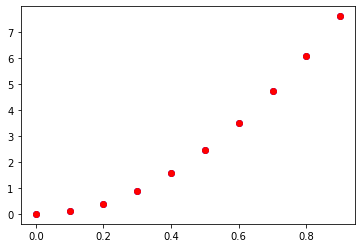

In [12]:
tfinal = 1
kT = np.arange(0, tfinal, T)
xz, yz = control.step_response(Gz, kT);

yz2 = tf_reqeq_exec(
    Gz, 
    step(0, tfinal, T=T)[1],
    initial_conditions=yz[:5]
)

plt.scatter(xz, yz, color='blue')
plt.scatter(xz, yz2, color='red')
assert_almost_equal(yz, yz2)

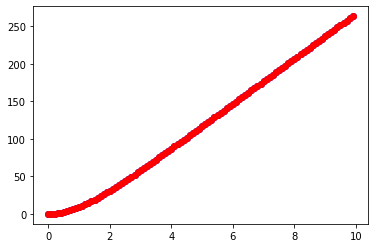

In [13]:
tfinal = 10
kT = np.arange(0, tfinal, T)
xz, yz = control.step_response(Gz, kT);

yz2 = tf_reqeq_exec(
    Gz, 
    step(0, tfinal, T=T)[1],
    initial_conditions=yz[:5]
)

plt.scatter(xz, yz, color='blue')
plt.scatter(xz, yz2, color='red')
assert_almost_equal(yz, yz2)

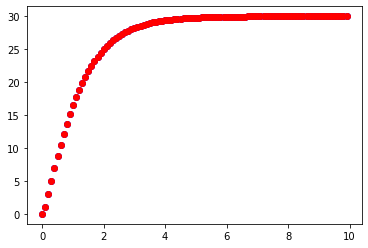

In [14]:
tfinal = 10
kT = np.arange(0, tfinal, T)
xz, yz = control.impulse_response(Gz, kT);

yz2 = tf_reqeq_exec(
    Gz, 
    delta(0, tfinal, T=T)[1],
    initial_conditions=yz[:5]
)

plt.scatter(xz, yz, color='blue')
plt.scatter(xz, yz2, color='red')
assert_almost_equal(yz, yz2)

(array([1. , 0.9, 0.8]), array([-1. ,  0.7]))

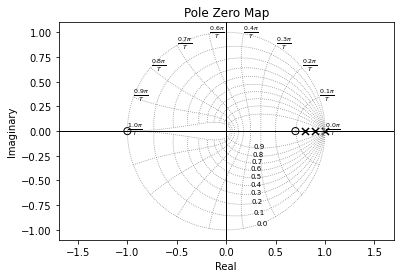

In [15]:
control.pzmap(Gz, grid=True)